In [81]:
#Loading the libraries

import os
import pandas as pd
import numpy as np
import seaborn as sns
import math 
import matplotlib.pyplot as plt
from sklearn import tree  
import pydot 
import graphviz 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict
from fancyimpute import KNN
%matplotlib inline

In [82]:
#Set the working directory
os.chdir("C:/Users/user/Desktop/mahesh/edwisor/Projects")

In [83]:
#loading data
df_bike = pd.read_csv('day.csv')

In [84]:
#checking top records of dataframe
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [85]:
#Shape of the dataset
df_bike.shape

(731, 16)

In [86]:
#Describe Columns of the Dataframe
df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [87]:
############### Missing value Analysis ##################

#Create dataframe with missing percentage
missing_val = pd.DataFrame(df_bike.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index':'Variables',0:'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(df_bike))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#Display missing_val
missing_val

#Observation : We can see that as displayed below,there are no null values present,hence KNN imputation is required.

,Variables,Missing_percentage
0,instant,0.0
1,dteday,0.0
2,season,0.0
3,yr,0.0
4,mnth,0.0
5,holiday,0.0
6,weekday,0.0
7,workingday,0.0
8,weathersit,0.0
9,temp,0.0


In [88]:
################ Exploratory data analysis ##################

#Data types
df_bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [89]:
################# Converting the appropriate required Datatypes ####################

#As they contain unqiue values we convert columnns into categorical factors 
column_names_category = ['season','yr','mnth','holiday','workingday','weekday','weathersit']
for i in column_names_category :
    df_bike[i] = df_bike[i].astype('category')

#Converting date into datetime format
df_bike['dteday'] = pd.to_datetime(df_bike['dteday'],yearfirst=True)

In [90]:
#For standardization we convert rest variables into float64 
for i in range(0,df_bike.shape[1]):
    if(df_bike.iloc[:,i].dtype == 'int64'):
        df_bike.iloc[:,i] = df_bike.iloc[:,i].astype('float')

info = df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null float64
dteday        731 non-null datetime64[ns]
season        731 non-null category
yr            731 non-null category
mnth          731 non-null category
holiday       731 non-null category
weekday       731 non-null category
workingday    731 non-null category
weathersit    731 non-null category
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null float64
registered    731 non-null float64
cnt           731 non-null float64
dtypes: category(7), datetime64[ns](1), float64(8)
memory usage: 57.8 KB


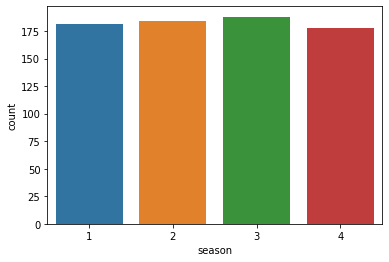

In [91]:
################### Univarte Analysis of Categorical Variables ####################

#Frequency Countplot of season variable
ax = sns.countplot(x='season',data=df_bike);

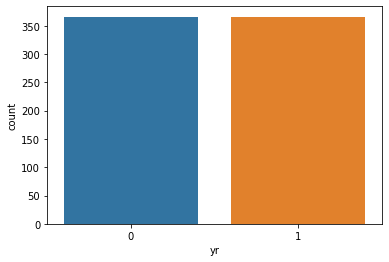

In [92]:
#Frequency Countplot of yr variable
ax = sns.countplot(x='yr',data=df_bike);

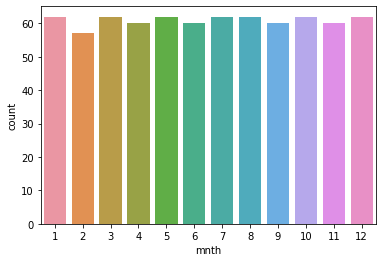

In [93]:
#Frequency Countplot of mnth variable
ax = sns.countplot(x='mnth',data=df_bike);

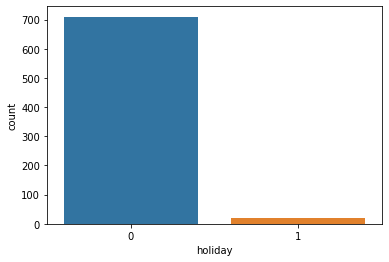

In [94]:
#Frequency Countplot for mnth variable
ax = sns.countplot(x='holiday',data=df_bike);

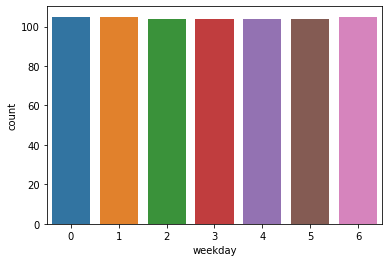

In [95]:
#Frequency Countplot of weekday variable
ax = sns.countplot(x='weekday',data=df_bike);

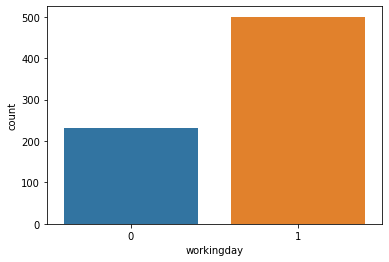

In [96]:
#Frequency Countplot of workingday variable
ax = sns.countplot(x='workingday',data=df_bike);

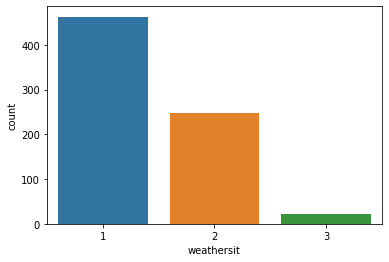

In [97]:
#Frequency Countplot of weathersit variable
ax = sns.countplot(x='weathersit',data=df_bike);

Cnt Skewness :  -0.04725555755362063
Cnt Kurtosis :  -0.8145762269613592


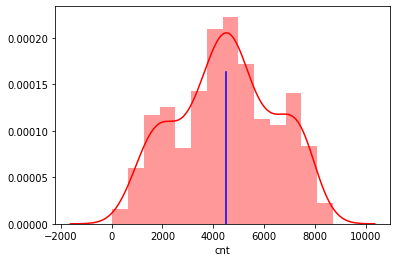

In [98]:
################### Univarte Analysis of Numerical Variables ####################

#Distribution of the Variable 'cnt'
ax = sns.distplot(df_bike['cnt'],color = 'r')
ax = plt.axvline(df_bike['cnt'].mean(), 0,0.7,color='b')

from scipy.stats import kurtosis,skew
print('Cnt Skewness : ', skew(df_bike['cnt']))
print('Cnt Kurtosis : ', kurtosis(df_bike['cnt']))

hum Skewness :  -0.06964015783152368
hum Kurtosis :  -0.07228631791987006
windspeed Skewness :  0.6759547264275362
windspeed Kurtosis :  0.39992023832685497


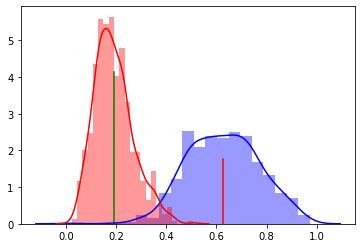

In [99]:
#Distribution of Variable 'hum','windspeed'

plt.axvline(df_bike['hum'].mean(),0,0.3,color = 'r')
plt.axvline(df_bike['windspeed'].mean(),0,0.7,color = 'g')

sns.distplot(df_bike['hum'],axlabel = False,color = 'b')
ax = sns.distplot(df_bike['windspeed'],axlabel = False,color = 'r')

print('hum Skewness : ', skew(df_bike['hum']))
print('hum Kurtosis : ', kurtosis(df_bike['hum']))
print('windspeed Skewness : ', skew(df_bike['windspeed']))
print('windspeed Kurtosis : ', kurtosis(df_bike['windspeed']))

atemp Skewness :  -0.1308188980737412
atemp Kurtosis :  -0.9866019052943136
temp Skewness :  -0.05440902480571618
temp Kurtosis :  -1.1194225488473057


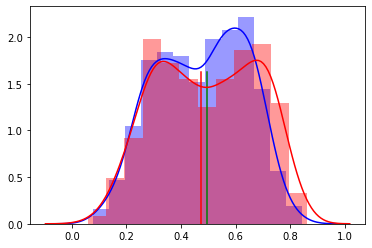

In [100]:
#Distribution of Variable 'atemp','temp'

plt.axvline(df_bike['atemp'].mean(), 0,0.7, color = 'r')
plt.axvline(df_bike['temp'].mean(), 0,0.7, color = 'g')

sns.distplot(df_bike['atemp'], axlabel = False, color = 'b')
ax = sns.distplot(df_bike['temp'], axlabel = False, color = 'r')

print('atemp Skewness : ', skew(df_bike['atemp']))
print('atemp Kurtosis : ', kurtosis(df_bike['atemp']))
print('temp Skewness : ', skew(df_bike['temp']))
print('temp Kurtosis : ', kurtosis(df_bike['temp']))

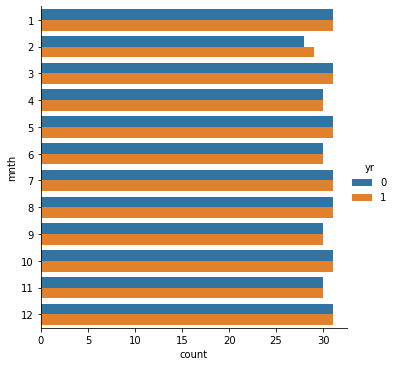

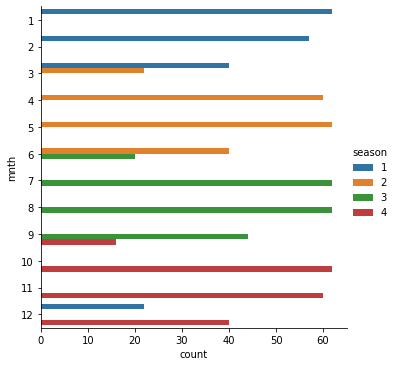

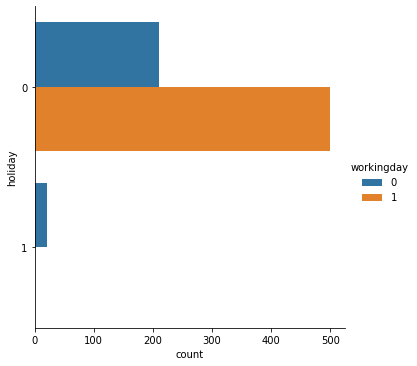

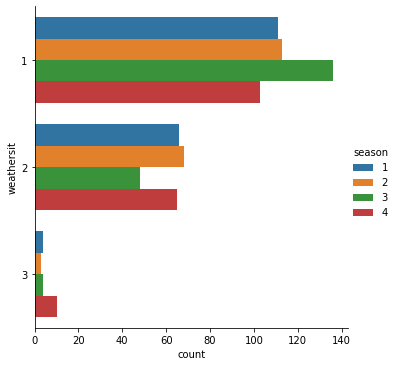

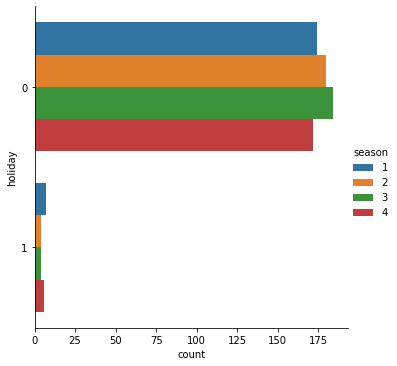

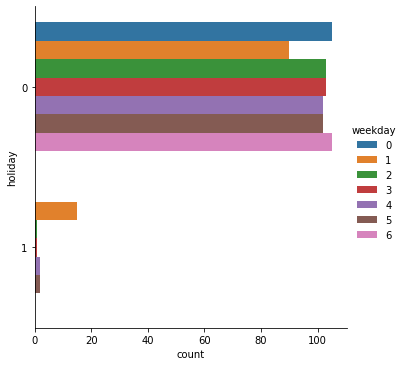

In [101]:
################# Bivariate Analysis of Categorical Variables #################

#Catplot for variable 'mnth' and 'yr'
ax = sns.catplot(y='mnth',hue='yr',kind="count",data=df_bike)

#Catplot for variable 'mnth' and 'season'
ax = sns.catplot(y='mnth',hue='season',kind="count",data=df_bike)

#Catplot for variable 'holiday' and 'workingday'
ax = sns.catplot(y='holiday',hue='workingday',kind="count",data=df_bike)

#Catplot for variable 'weathersit' and 'season'
ax = sns.catplot( y='weathersit',hue='season',kind="count",data=df_bike)

#Catplot for variable 'holiday' and 'season'
ax = sns.catplot(y='holiday',hue='season',kind="count",data=df_bike)

#Catplot for variable 'holiday' and 'weekday'
ax = sns.catplot( y='holiday',hue='weekday',kind="count",data=df_bike)

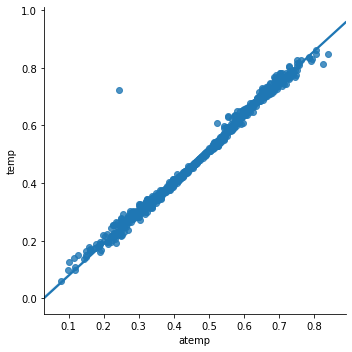

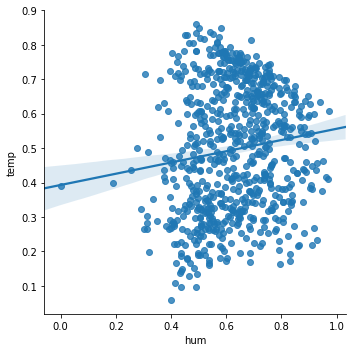

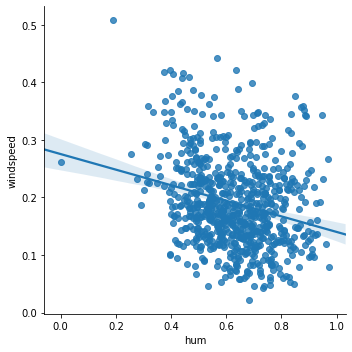

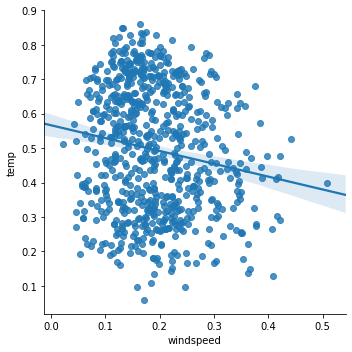

In [102]:
################# Bivariate Analysis of Numerical Variables ##################

#Scatter plot of Variable 'atemp','temp'
ax = sns.lmplot(x="atemp",y="temp",data=df_bike);

#Scatter plot of Variable 'hum','temp'
ax = sns.lmplot(x="hum",y="temp",data=df_bike);

#Scatter plot of Variable 'windspeed','hum'
ax = sns.lmplot(x="hum",y="windspeed",data=df_bike);

#Scatter plot of Variable 'windspeed','temp'
ax = sns.lmplot(x="windspeed",y="temp",data=df_bike);

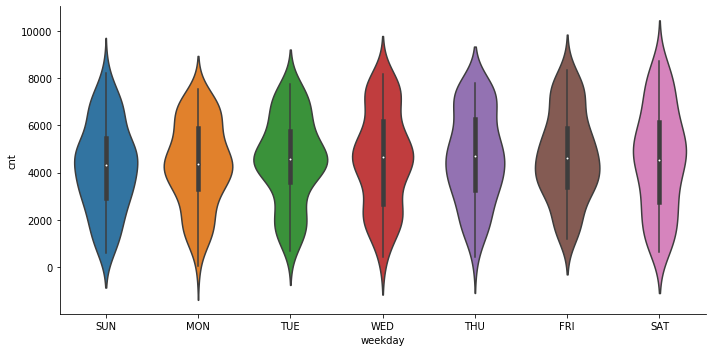

In [103]:
################ Bivariate Analysis with dependant Variable ##################

#Bike_Rental Count per Day
ax = sns.catplot(x="weekday",y="cnt",data=df_bike.reset_index(),kind="violin",height=5,aspect=2)
ax= ax.set_xticklabels(['SUN','MON','TUE','WED','THU','FRI','SAT'])

In [104]:
####### Observation : The count is almost similar to each other and uniform ########

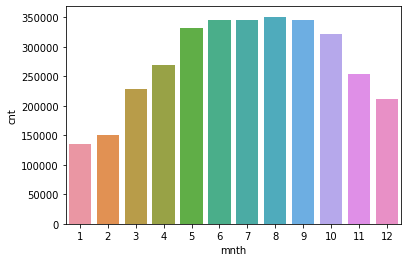

In [105]:
#Bike rental Count on Monthly Basis
monthly_count = pd.DataFrame(df_bike.groupby(['mnth']).sum())
ax = sns.barplot(x="mnth",y="cnt",data=monthly_count.reset_index())

#Observation : Sales are peak during the mid-year,and less bikes are rented on the month of Jan,Feb.

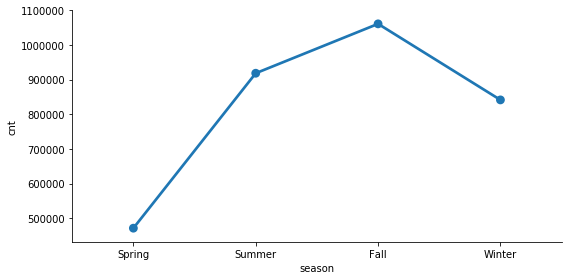

In [106]:
#Seasonal Basis count
seasonal_count = pd.DataFrame(df_bike.groupby(['season']).sum())
ax = sns.catplot(x="season",y="cnt",data=seasonal_count.reset_index(),kind="point",height=4,aspect=2)
ax = ax.set_xticklabels(['Spring','Summer','Fall','Winter'])

#Observation : Very low during Spring Season and very high during Fall Season.

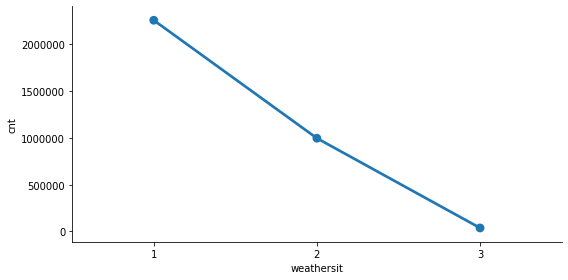

In [107]:
#Weather Type Basis count
weather_type = pd.DataFrame(df_bike.groupby(['weathersit']).sum())
ax = sns.catplot(x="weathersit",y="cnt",data=weather_type.reset_index(),kind="point",height=4,aspect=2)

#Observation : There are no bike rentals during heavy rain.

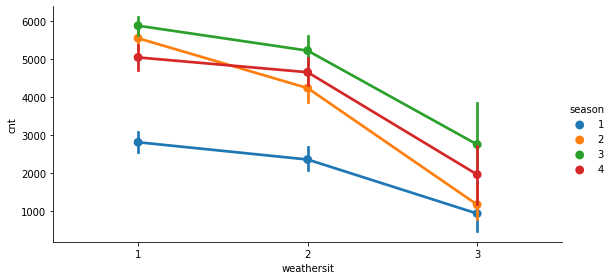

In [108]:
# Catplot for variable 'weathersit' and 'season'
ax = sns.catplot(x= "weathersit",y='cnt',hue='season',kind="point",data=df_bike,height=4,aspect=2)

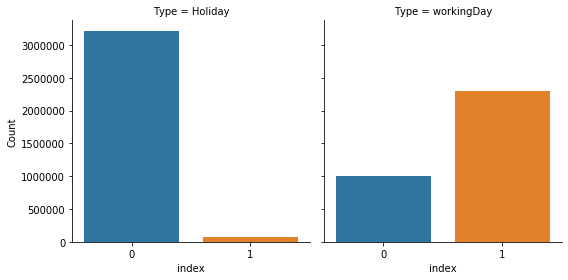

In [109]:
#Bike Rental Count on basis of Day Type (Holiday/Working Day)------------------x
holiday = pd.DataFrame(df_bike.groupby(['holiday']).sum())
workingday = pd.DataFrame(df_bike.groupby(['workingday']).sum())
holiday = pd.DataFrame({'Count' : holiday['cnt'],'Type':'Holiday'})
workingday = pd.DataFrame({'Count' : workingday['cnt'],'Type':'workingDay'})
plot = holiday.append(workingday,sort=False)
ax = sns.catplot(x="index",y="Count",data=plot.reset_index(),col="Type",kind="bar",height=4,aspect=1)

#Observation : Bikes are rented more on Non-Holiday's and compartively more on working day (excluding weekends)

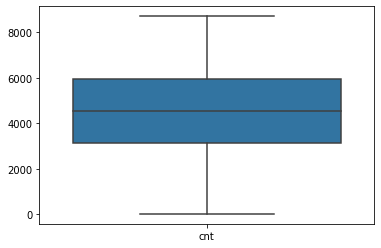

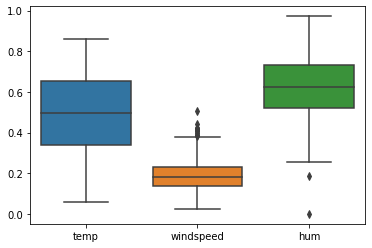

In [110]:
####################### Outlier analysis #########################

#Boxplot for total_count outliers 
sns.boxplot(data=df_bike[['cnt']]) 
ax.fig.suptitle('cnt outliers')
plt.show()

#Box plot for Temp,windspeed and humidity_outliers 
sns.boxplot(data=df_bike[['temp','windspeed','hum']])
ax.fig.suptitle('Temp_windspeed_hum_outiers') 
plt.show()

#Replace and imputate the outliers 
from fancyimpute import KNN

#create dataframe for the outliers 
wind_hum=pd.DataFrame(df_bike,columns=['windspeed','hum']) 

#Cnames for the outliers 
cnames=['windspeed','hum']

for i in cnames: 
    q75,q25=np.percentile(wind_hum.loc[:,i],[75,25])  # Divide data into 75%quantile and 25%quantile.
    iqr=q75-q25                                       #Inter quantile range
    min=q25-(iqr*1.5)                                 #inner fence
    max=q75+(iqr*1.5)                                 #outer fence 
    wind_hum.loc[wind_hum.loc[:,i]<min,:i]=np.nan     #Replace with NA 
    wind_hum.loc[wind_hum.loc[:,i]>max,:i]=np.nan     #Replace with NA
    
#Imputating the outliers by mean Imputation 
wind_hum['windspeed']=wind_hum['windspeed'].fillna(wind_hum['windspeed'].mean()) 
wind_hum['hum']=wind_hum['hum'].fillna(wind_hum['hum'].mean())

#Replacing the imputated windspeed 
df_bike['windspeed']=df_bike['windspeed'].replace(wind_hum['windspeed']) 
#Replacing the imputated humidity
df_bike['hum']=df_bike['hum'].replace(wind_hum['hum'])

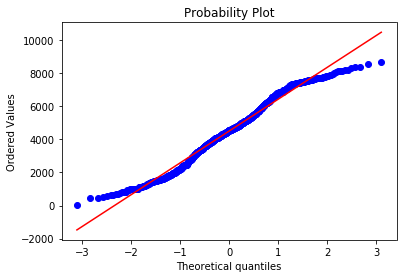

In [111]:
####################### Feature selection ########################

#Normality check
import scipy
from scipy import stats 
stats.probplot(df_bike.cnt.tolist(),dist='norm',plot=plt)
plt.show()

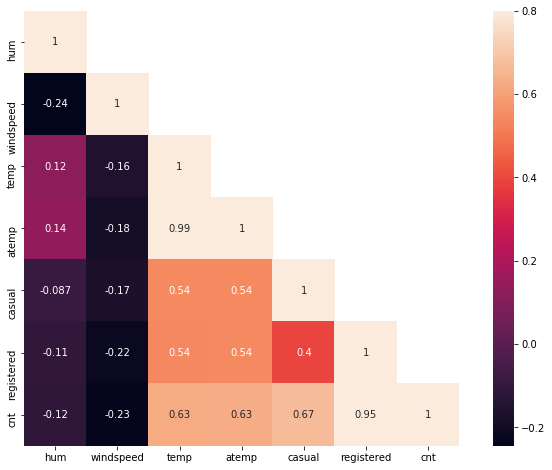

In [112]:
#Correlation analysis
cnames = ['hum','windspeed','temp','atemp','casual','registered','cnt']
df_corr = df_bike.loc[:,cnames]
corr = df_corr.corr()

#Heatmap for correlation matrix of attributes
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
f, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(corr,mask=mask,vmax=.8,square=True,annot=True,ax=ax)

In [113]:
####################### Splitting the dataset ########################

#Split the dataset into the train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_bike.iloc[:,0:-3],df_bike.iloc[:,-1],test_size=0.2,random_state=42)

#Reset train index values
X_train.reset_index(inplace=True) 
y_train=y_train.reset_index()

# Reset test index values
X_test.reset_index(inplace=True) 
y_test=y_test.reset_index()

####Encoding the categorical attributes

#Create a new dataset for train attributes
train_attributes=X_train[['season','mnth','yr','weekday','holiday','workingday','weathersit','hum','temp','windspeed']]

#Create a new dataset for test attributes 
test_attributes=X_test[['season','mnth','yr','weekday','holiday', 'workingday','hum','temp','windspeed','weathersit']]

#categorical attributes in dataset
category_attributes=['season','holiday','workingday','weathersit','yr']
#numerical attributes in dataset
numerical_attributes=['temp','windspeed','hum','mnth','weekday']

#Encode the categorical features to numeric to get dummy variables
train_encoded_attributes=pd.get_dummies(train_attributes,columns=category_attributes)
test_encoded_attributes=pd.get_dummies(test_attributes,columns=category_attributes)

Model accuracy : 0.822252579155055


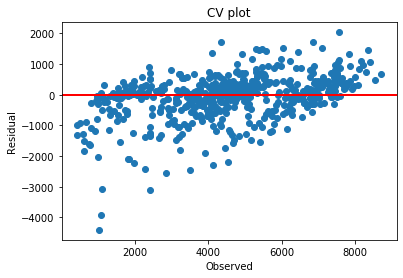

R-squared scores : 0.8049555413033743


In [114]:
####################### Linear Regression Model ########################

#Training dataset for modelling 
X_train=train_encoded_attributes 
y_train=y_train.cnt.values

#Training the model 
lr_model=linear_model.LinearRegression().fit(X_train,y_train)

#Accuracy of the model
lr=lr_model.score(X_train,y_train)
print('Model accuracy :',lr)

#Cross validation prediction 
pred = cross_val_predict(lr_model,X_train,y_train,cv=3)

#Cross validation plot
fig,ax=plt.subplots(figsize=(6,4)) 
ax.scatter(y_train,y_train-predict) 
ax.axhline(lw=2,color='RED') 
ax.set_title('CV plot') 
ax.set_xlabel('Observed') 
ax.set_ylabel('Residual') 
plt.show()

#R-squared scores 
r2_scores = cross_val_score(lr_model,X_train,y_train,cv=3) 
print('R-squared scores :',np.average(r2_scores))

RMSE : 808.2982060398782
MAE : 602.4825154366126


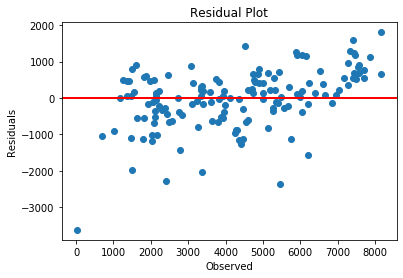

In [115]:
#Prediction on test dataset

X_test=test_encoded_attributes  
y_test=y_test.cnt.values 

#predicting the model 
lr_pred=lr_model.predict(X_test) 
  
#RMSE 
rmse=math.sqrt(metrics.mean_squared_error(y_test,lr_pred))
print('RMSE :',rmse)

#MAE 
mae=metrics.mean_absolute_error(y_test,lr_pred)
print('MAE :',mae)

#Residual plot  
fig, ax = plt.subplots(figsize=(6,4))  
ax.scatter(y_test,y_test-lr_pred) 
ax.axhline(lw=2,color='RED')  
ax.set_xlabel('Observed') 
ax.set_ylabel('Residuals')  
ax.title.set_text("Residual Plot") 
plt.show() 

Model accuracy : 0.7955299757439227


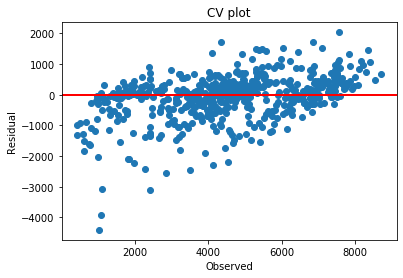

R-squared scores : 0.7434063300762158


In [116]:
####################### Decision tree model ########################

#training our model 
dt_model = DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=8).fit(X_train,y_train)

#Accuracy of the model  
dt_score=dt_model.score(X_train,y_train)
print('Model accuracy :',dt_score)

#Exporting our learned model to tree  
dot_data = tree.export_graphviz(dt_model,out_file=None)   
graph = graphviz.Source(dot_data) 

#Cross validation prediction  
pred = cross_val_predict(dt_model,X_train,y_train,cv=3) 

#Cross validation plot 
fig,ax=plt.subplots(figsize=(6,4))  
ax.scatter(y_train,y_train-predict)  
ax.axhline(lw=2,color='RED')  
ax.set_title('CV plot')  
ax.set_xlabel('Observed')  
ax.set_ylabel('Residual')  
plt.show()

#R-squared scores  
r2_scores = cross_val_score(dt_model,X_train,y_train,cv=3)  
print('R-squared scores :',np.average(r2_scores)) 

RMSE : 978.7274671050251
MAE : 700.6370224303977


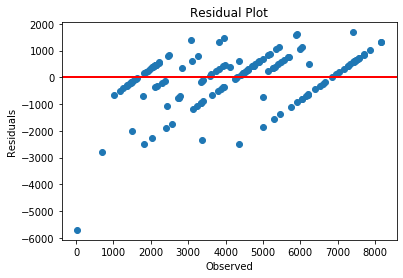

In [117]:
#Prediction on test dataset

#predicting the model  
dt_pred=dt_model.predict(X_test) 

#RMSE 
rmse=math.sqrt(metrics.mean_squared_error(y_test,dt_pred))
print('RMSE :',rmse)

#MAE 
mae=metrics.mean_absolute_error(y_test,dt_pred)
print('MAE :',mae)

#Residual plot  
fig, ax = plt.subplots(figsize=(6,4))  
ax.scatter(y_test,y_test-dt_pred) 
ax.axhline(lw=2,color='RED')  
ax.set_xlabel('Observed') 
ax.set_ylabel('Residuals')  
ax.title.set_text("Residual Plot") 
plt.show()

Model accuracy : 0.9821279220482421


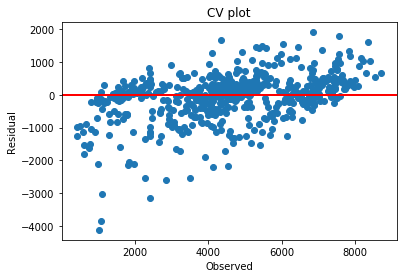

R-squared scores : 0.8552109899004008


In [118]:
####################### Random Forest model ########################

#training our model 
rf_model=RandomForestRegressor(n_estimators=200).fit(X_train,y_train) 

#Accuracy of the model  
rf_score=rf_model.score(X_train,y_train)
print('Model accuracy :',rf_score)

#Cross validation prediction  
predict=cross_val_predict(rf_model,X_train,y_train,cv=3) 

#Cross validation plot 
fig,ax=plt.subplots(figsize=(6,4))  
ax.scatter(y_train,y_train-predict)  
ax.axhline(lw=2,color='RED')  
ax.set_title('CV plot')  
ax.set_xlabel('Observed')  
ax.set_ylabel('Residual')  
plt.show()

#R-squared scores  
r2_scores = cross_val_score(rf_model,X_train,y_train,cv=3)  
print('R-squared scores :',np.average(r2_scores))

RMSE : 684.6732095719915
MAE : 433.6593537414966


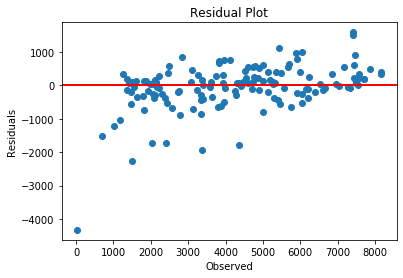

In [119]:
#Prediction on test dataset

#predicting the model  
rf_pred=rf_model.predict(X_test) 

#RMSE 
rmse=math.sqrt(metrics.mean_squared_error(y_test,rf_pred)) 
print('RMSE :',rmse)

#MAE 
mae=metrics.mean_absolute_error(y_test,rf_pred)
print('MAE :',mae)

#Residual plot  
fig, ax = plt.subplots(figsize=(6,4))  
ax.scatter(y_test,y_test-rf_pred) 
ax.axhline(lw=2,color='RED')  
ax.set_xlabel('Observed') 
ax.set_ylabel('Residuals')  
ax.title.set_text("Residual Plot") 
plt.show()

In [120]:
#Final model for predicting the bike rental on daily basis  
    
df1_bike = pd.DataFrame(y_test,columns=['y_test'])
df2_bike = pd.DataFrame(rf_pred,columns=['rf_pred'])  
Bike_predictions = pd.merge(df1_bike,df2_bike,left_index=True,right_index=True)  
Bike_predictions.to_csv('Bike_Renting_submission_Python.csv')